## <center> Image Processing

### Abstract

Trong bài viết này, ta sẽ tìm hiểu ứng dụng của đại số tuyến tính vào các ứng dụng trong xử lý hình ảnh - là quá trình chuyển đổi hình ảnh sang dạng kỹ thuật số và thực hiện một số thao tác nhất định để lấy một số thông tin hữu ích từ nó.

### 1. Introduction

Xử lý hình ảnh đã trở thành một lĩnh vực nghiên cứu quan trọng, đóng vai trò quan trọng trong việc phân tích và hiểu rõ thông tin từ hình ảnh. Trong ngữ cảnh này, đại số tuyến tính đã tỏ ra là một công cụ mạnh mẽ và linh hoạt, đặc biệt là khi áp dụng vào các ứng dụng xử lý hình ảnh.

Ở bài này, ta sẽ xử lý hình ảnh với các chức năng sau: thay đổi độ sáng (brightness), thay đổi độ tương phản (contrast), lật hình ảnh, thay đổi ảnh thành màu xám, thay đổi độ bão hoà (saturation), làm mờ hình ảnh (blur), làm sắc nét hình ảnh (sharpen) và ~~làm méo mó hình ảnh (distortion)~~.

### 2. Xử lý hình ảnh

### 2.1. Lật hình ảnh

#### 2.1.1. Lật ảnh theo chiều ngang

Để lật ảnh theo chiều ngang, ta cần phải giữ hoành độ không đổi, và thay đổi tung độ theo hướng ngược lại. Vì thế ta có ma trận sau:

$$\begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}$$

Giải thích: Đặt $x_{1old}$ là hoành độ, $x_{2old}$ là tung độ, ta sẽ có hệ phương trình sau, kết quả sẽ có hoành độ mới bằng hoành độ cũ và tung độ mới ngược với tung độ cũ:

$$\begin{cases}
      x_{1new} = 1 * x_{1old} + 0 * x_{2old} = x_{1old}\\
      x_{2new} = 0 * x_{1old} - 1 * x_{2old} = -x_{2old}\\
\end{cases}$$  

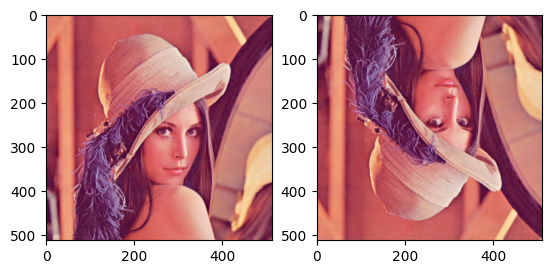

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc hình ảnh
img = cv2.imread("lenna.png")
img = img.astype(float)
height, width, channel = img.shape

# Lưu output
output = np.zeros((height, width, channel))

# Lưu ma trận transform
transform = np.array([[1, 0],
                      [0, -1]])

# Xử lý lật ảnh
for abscissa in range(height):
    for ordinate in range(width):
        # Lưu màu của pixel đó
        pixel = img[abscissa, ordinate, :]

        # Tìm toạ độ mới
        new_ordinate, new_abscissa = np.array(
            [ordinate, abscissa]).dot(transform)

        # Lưu màu vào toạ độ mới
        output[new_abscissa, new_ordinate, :] = pixel

# Hiển thị hình ảnh
fig, ax = plt.subplots(1, 2)
ax[0].imshow(cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(output.astype(np.uint8), cv2.COLOR_BGR2RGB))

#### 2.1.2. Lật ảnh theo chiều dọc

Để lật ảnh theo chiều dọc, ta cần phải giữ tung độ không đổi, và thay đổi hoành độ theo hướng ngược lại. Vì thế ta có ma trận sau:

$$\begin{bmatrix} -1 & 0 \\ 0 & 1 \end{bmatrix}$$

Giải thích: Đặt $x_{1old}$ là hoành độ, $x_{2old}$ là tung độ, ta sẽ có hệ phương trình sau, kết quả sẽ có tung độ mới bằng tung độ cũ và hoành độ mới ngược với hoành độ cũ:

$$\begin{cases}
      x_{1new} = -1 * x_{1old} + 0 * x_{2old} = -x_{1old}\\
      x_{2new} = 0 * x_{1old} + 1 * x_{2old} = x_{2old}\\
\end{cases}$$  

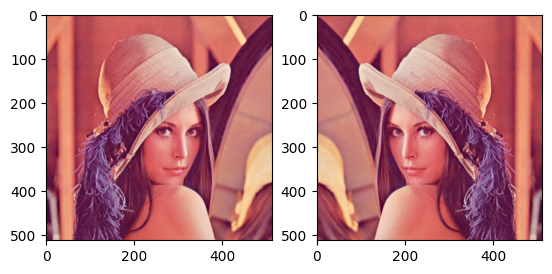

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc hình ảnh
img = cv2.imread("lenna.png")
img = img.astype(float)
height, width, channel = img.shape

# Lưu output
output = np.zeros((height, width, channel))

# Lưu ma trận transform
transform = np.array([[-1, 0],
                      [0, 1]])

# Xử lý lật ảnh
for abscissa in range(height):
    for ordinate in range(width):
        # Lưu màu của pixel đó
        pixel = img[abscissa, ordinate, :]

        # Tìm toạ độ mới
        new_ordinate, new_abscissa = np.array(
            [ordinate, abscissa]).dot(transform)

        # Lưu màu vào toạ độ mới
        output[new_abscissa, new_ordinate, :] = pixel

# Hiển thị hình ảnh
fig, ax = plt.subplots(1, 2)
ax[0].imshow(cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(output.astype(np.uint8), cv2.COLOR_BGR2RGB))

### 2.2. Độ sáng, tương phản, xám hóa

#### 2.2.1 Tăng (giảm) độ sáng của ảnh

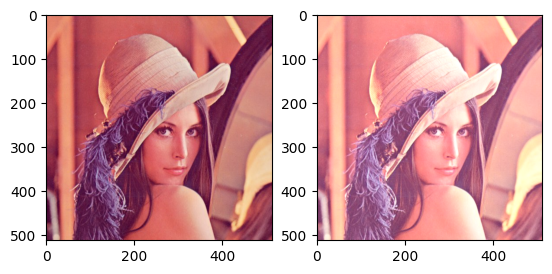

In [ ]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

def brnAdjust(img, amount):
    # Tăng độ sáng bằng cách cộng thêm vào mỗi pixel một lượng amount
    img = img + [amount, amount, amount]
    
    # Giới hạn giá trị của mỗi pixel trong khoảng từ 0 đến 255
    img = np.clip(img, 0.0, 255.0)
    
    return img.astype(np.uint8)

# Đọc hình ảnh
img = cv2.imread("lenna.png", 1)
img.astype(float)

# Áp dụng độ sáng
output = brnAdjust(img, 50)

# Hiển thị hình ảnh
cv2.imwrite("brightness.jpg", output)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(output.astype(np.uint8), cv2.COLOR_BGR2RGB))

#### 2.2.2 Tăng (giảm) độ tương phản của ảnh

- Đối với việc nhân tích chập của các phần tử thì $[0, 1]$ là khoảng mà contrast biến thành màu tối, $[1, \infty)$ là khoảng mà contrast thành màu sáng
- Chọn khoảng giá trị chấp nhận của đầu vào là $[-50, 50]$.
- Map từ  $[-50, 50]$ thành $[0, \infty)$ nhờ hàm $f(x) = - \ln (\frac{100}{x+50} - 1)$ (hàm ngược của hàm $\frac{100}{1 + e^{-x}} - 50$)

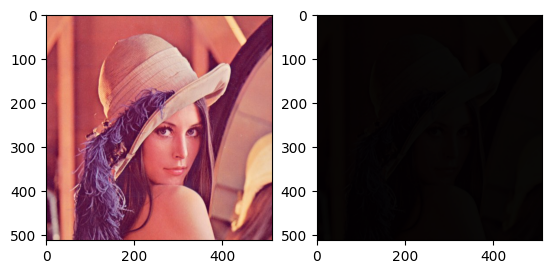

In [ ]:
import cv2 
import numpy as np
import math
def conAdjust(img, amount):
    
    # Giới hạn giá trị của amount trong khoảng từ -50 đến 50
    amount = np.clip(amount, -50, 50) 
    amount = - math.log(100 / ( amount + 50) - 1)
    
    # Nhân tích chập với amount
    img = img * [amount, amount, amount]
    
    # Giới hạn giá trị của mỗi pixel trong khoảng từ 0 đến 255
    img = np.clip(img, 0.0, 255.0)
    
    return img.astype(np.uint8)

# Đọc hình ảnh
img = cv2.imread("lenna.png", 1)
img.astype(float)

# Áp dụng độ tương phản
output = conAdjust(img, 1)

# Hiển thị hình ảnh
cv2.imwrite("constrast.jpg", output)   
fig, ax = plt.subplots(1, 2)
ax[0].imshow(cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(output.astype(np.uint8), cv2.COLOR_BGR2RGB))

#### 2.2.3 Xám hóa hình ảnh (Grayscale) 

Formula for grayscale: [Wikipedia](https://en.wikipedia.org/wiki/Grayscale#Converting_color_to_grayscale)

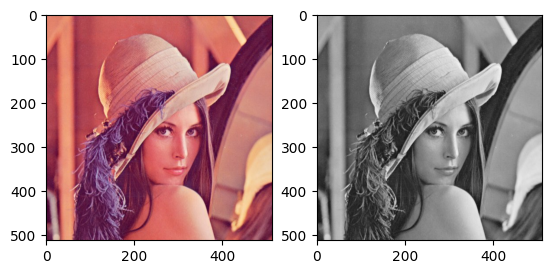

In [ ]:
import cv2 
import numpy as np
import math

def greyScale(img, weighted_sum):
    # Áp dụng công thức
    img = np.dot(img, weighted_sum)
    img = np.where(img <= 0.0031308, 12.92*img, 1.055*img - 0.055)    
    
    img = np.clip(img, 0.0, 255.0)
    return img.astype(np.uint8)

# Khai báo weighted_sum
weighted_sum = np.array([0.2126, 0.7152, 0.0722]) # corresponding Red, Green and Blue channel

# Đọc hình ảnh
img = cv2.imread("lenna.png", 1)
img.astype(float)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Áp dụng greyScale
output = greyScale(img, weighted_sum)

# Hiển thị hình ảnh
cv2.imwrite("greyscale.jpg", output)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img)
ax[1].imshow(cv2.cvtColor(output.astype(np.uint8), cv2.COLOR_BGR2RGB))

### 2.3. Convolution

#### 2.3.1. Định nghĩa

Convolution là quá trình thêm từng phần tử của hình ảnh vào các phần tử lân cận cục bộ của nó, được tính theo trọng số của kernel. Điều này liên quan đến một dạng tích chập toán học. Phép toán ma trận đang được thực hiện tích chập, không phải là phép tích vô hướng, mặc dù được ký hiệu tương tự bằng *.

Ví dụ:

$\begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} * \begin{bmatrix} 5 & 6 \\ 7 & 8 \end{bmatrix} = 1*5 + 2*6 + 3*7 + 4*8 = 70$

Referece: https://en.wikipedia.org/wiki/Kernel_(image_processing)

#### 2.3.2. Làm mờ hình ảnh áp dụng convolution

Bên dưới sử dụng kernel như sau: 

$$\frac{1}{9}\begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1 \end{bmatrix}$$

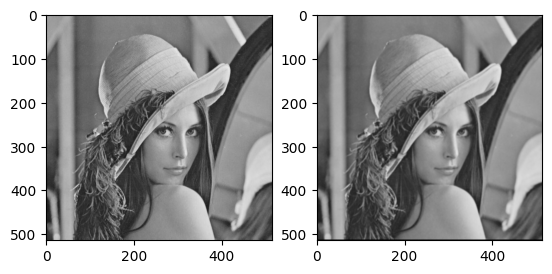

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc hình ảnh dạng grayscale
img = cv2.imread("lenna.png", 0)
img = np.pad(img, ((1, 1), (1, 1)), 'edge')
height, width = img.shape

# Kernel
kernel = (1/9) * np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])

# Lưu output
output = np.zeros((height, width))

# Xử lý hình ảnh
for abscissa in range(1, height - 1):
    for ordinate in range(1, width - 1):
        output[abscissa, ordinate] = np.sum(img[abscissa - 1 : abscissa + 2, ordinate - 1 : ordinate + 2] * kernel)
        
# Clip
output = np.clip(output, 0, 255)

# Hiển thị hình ảnh
fig, ax = plt.subplots(1, 2)
ax[0].imshow(cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(output.astype(np.uint8), cv2.COLOR_GRAY2RGB))

#### 2.3.3 Làm sắc nét hình ảnh áp dụng phép convolution (dùng kết quả grayscale)

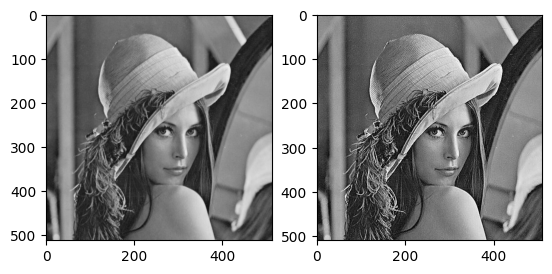

In [ ]:
import numpy as np
import cv2
sharpen_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

def limit(x, n):
    if (x <= 0):
        return 0
    return n - 1 if x > n - 1 else x 

def applyKernel(img, kernel):

    # Get the height, width, and number of channels of the image
    height, width = img.shape[0], img.shape[1]
    
    # Get the height, width, and number of channels of the kernel
    kernel_height, kernel_width = kernel.shape[0], kernel.shape[1]    
     
    # Create a new image of original img size minus the border 
    # where the convolution can't be applied
    new_img = np.zeros((height-kernel_height+1,width-kernel_width+1,3)) 

    # Loop through each pixel in the image
    # But skip the outer edges of the image
    for i in range(kernel_height//2, height-kernel_height//2-1):
        for j in range(kernel_width//2, width-kernel_width//2-1):
            # Extract a window of pixels around the current pixel
            window = img[i-kernel_height//2 : i+kernel_height//2+1,j-kernel_width//2 : j+kernel_width//2+1]
            
            # Apply the convolution to the window and set the result as the value of the current pixel in the new image
            new_img[i, j] = int((window[:,:] * kernel).sum())
      
    # Clip values to the range 0-255
    new_img = np.clip(new_img, 0, 255)
    
    return new_img.astype(np.uint8)

# Đọc hình ảnh
img = cv2.imread("lenna.png", 1).astype(float)
img = greyScale(img, weighted_sum)
img = np.asarray(img)

# Áp dụng sharpen kernel vào ảnh
output = applyKernel(img, sharpen_kernel)

# Hiển thị hình ảnh
cv2.imwrite("sharpen.jpg", output)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(output.astype(np.uint8), cv2.COLOR_BGR2RGB))

### 2.4. Cắt hình ảnh theo hình tròn

Áp dụng như bài background subtraction và áp dụng vào hình tròn, gọi O($x_o,y_o$) là tâm hình tròn, A($x_a,y_a$) là điểm bất kỳ của hình ảnh:

$$\begin{cases}
      x_o - x_a <= R: \text{điểm thuộc hình tròn và cần giữ}\\
      x_o - x_a > R: \text{điểm thuộc ngoài hình tròn và cần cắt}\\
\end{cases}$$ 

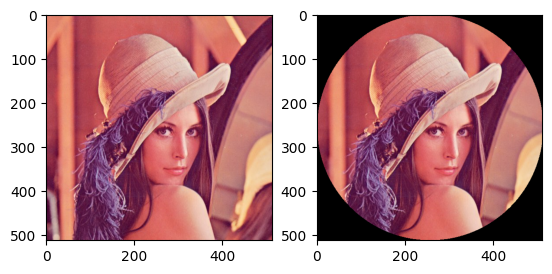

In [4]:
import cv2
import colorsys
import numpy as np
import matplotlib.pyplot as plt

# Đọc hình ảnh
img = cv2.imread("lenna.png")
img = img.astype(float)
height, width, channel = img.shape

# Cắt hình ảnh theo hình vuông
edge = min(height, width)
crop_img = img[edge - 1, edge - 1, :]

# Tâm bức ảnh
center = [edge//2, edge//2]

# Bán kính:
radius = edge//2

# Lưu output
output = np.zeros((height, width, channel))

# Xử lý hình ảnh
for abscissa in range(edge):
    for ordinate in range(edge):

        # Tính khoảng cách từ điểm đang xét đến trung tâm
        dist = np.linalg.norm(
            np.array([abscissa, ordinate]) - np.array(center))

        # Nếu điểm đó trong hình tròn thì lấy màu của ảnh, ngược lại lấy màu đen
        if dist <= radius:
            # Lưu màu của pixel ảnh gốc
            pixel = img[abscissa, ordinate, :]
            # Lưu màu vào ảnh
            output[abscissa, ordinate, :] = pixel

# Hiển thị hình ảnh
fig, ax = plt.subplots(1, 2)
ax[0].imshow(cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(output.astype(np.uint8), cv2.COLOR_BGR2RGB))

### 3. Conclusion

Khi thay đổi độ sáng, chúng ta sẽ sử dụng công cụ đại số tuyến tính để thực hiện quá trình này, giúp chúng ta điều chỉnh mức độ sáng một cách linh hoạt và hiệu quả. Về việc thay đổi độ tương phản, chúng ta có thể áp dụng những nguyên lý tương tự để kiểm soát sự đối lập giữa các sắc màu trong hình ảnh.

Như vậy, bằng cách kết hợp sức mạnh của OpenCV với đại số tuyến tính, chúng ta không chỉ mở ra cánh cửa cho việc hiểu biết sâu sắc về xử lý hình ảnh mà còn tận dụng linh hoạt và sáng tạo trong các ứng dụng thực tế.


## Features 
brightness
<br>
contrast
<br>
"flip picture"
<br>
chuyển màu ảnh sang gray
<br>
"saturation"
<br>
"làm mờ"
<br>
làm ảnh sắc nét
<br>
distortion

#### Sharpen (RBG Colors)

In [ ]:
import numpy as np
import cv2
sharpen_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]).astype(float)

In [ ]:
def limit(x, n):
    if (x <= 0):
        return 0
    return n - 1 if x > n - 1 else x 

def applyKernel(img, kernel):
    img_height, img_width = img.shape[:2]
    kernel_height, kernel_width = kernel.shape[:2]
    print(kernel_height, kernel_width)
    padding_x = int(kernel_width / 2)
    padding_y = int(kernel_height / 2)
    
    for row in range(img_height):
        for col in range(img_width):
            
            # Get the array of pixel values (Region of Interest) adjacent to pixel[i,j]
            roi = img[ limit(row - padding_y, kernel_height): limit(row + padding_y, kernel_height) + 1, limit(col - padding_x, kernel_width): limit(col + padding_x, kernel_width) + 1]
            print(roi)
            print(list(range( limit(col - padding_x, kernel_width), limit(col + padding_x, kernel_width) + 1)))
            img[row, col] = np.sum(roi * kernel, axis=(0, 1))
    img = np.clip(img, 0.0, 255.0)
    return img.astype(np.uint8)

img = cv2.imread("nature.jpg", 1).astype(float)
img = applyKernel(img, sharpen_kernel)
cv2.imwrite("sharpen.jpg", img)